Modules nécessaires : 

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [3]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-05 19:52:21,106 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-05 19:52:21,106 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-05 19:52:21,118 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-05 19:52:21,118 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-05 19:52:21,196 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-05 19:52:22,215 - HiggsML.datasets     - INFO     - Data loaded successfully


In [4]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [5]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [6]:
path.append(submission_dir)
from model import Model

Testing Settings

In [7]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [8]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Graphique

In [9]:
def graphique(S, E):
    plt.plot(S, E, marker='o', linestyle='-', color='b')
    plt.title('Significance en fonction de epochs')
    plt.xlabel('epochs')
    plt.ylabel('significance')
    plt.legend()
    plt.grid(True)
    plt.show()

Significance

In [ ]:

def optimization(train_data): 
    L_epochs = np.linspace(0, 50, 11)
    sigmax = 0
    epochs_max = 1
    S = []
    E = []
    for k in range(len(L_epochs)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.epochs = int(L_epochs[k])
        print(ingestion.model.model.epochs)
        ingestion.fit_submission()
        sig1 = ingestion.model.sig
        print(sig1)
        #visualisation des données :
        S.append(sig1)
        E.append(int(L_epochs[k]))
        if sig1>sigmax: 
            sigmax = sig1
            epochs_max = int(L_epochs[k])
    graphique(E, S)
    return sigmax, epochs_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"]

Lancement de la boucle

A l'aide des autres programmes d'optimisations, on a obtenu batchsize : 120, 

Paramètres par défauts : 
300 000 données initiales
batchsize = 16
number_of_layers = 10
width = 300
activation = 'relu'

2025-06-05 19:52:23,701 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 19:52:23,719 - HiggsML.datasets     - INFO     - Selected train size: 100000
2025-06-05 19:52:24,109 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 19:52:24,134 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  670.0091822762457
sum_bkg_weights:  105048.99081772374


2025-06-05 19:52:24,512 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 19:52:24,549 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  675.2157552874401
sum_bkg_weights:  105043.78424471257


2025-06-05 19:52:24,947 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 19:52:25,074 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  670.7839016361472
sum_bkg_weights:  105048.21609836388
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
0
2867/2867 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
score shape before threshold (91735,)
score shape after threshold (91735,)
2867/2867 ━━━━━━━━━━━━━━━━━━━━ 3s 976us/step
2867/2867 ━━━━━━━━━━━━━━━━━━━━ 3s 930us/step
saved_info {'beta': np.float64(36611.75940283273), 'gamma': np.float64(297.32307714187607), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x00000182800E7A60>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x00000182800E7B00>}
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2867/2867 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Holdout Significance:  2.071465885478529
2865/2865 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Train Results: 
	 mu_hat  :  2.0780680768537896
	 del_mu_stat  :  0.6461569289081865
	 del_mu_sys  :  0.0
	 del_mu_tot  :  0.6461569289081865
Holdout Results: 
	 mu_hat  :  0.9999999999999958
	 del_mu_stat  :  0.646156928908

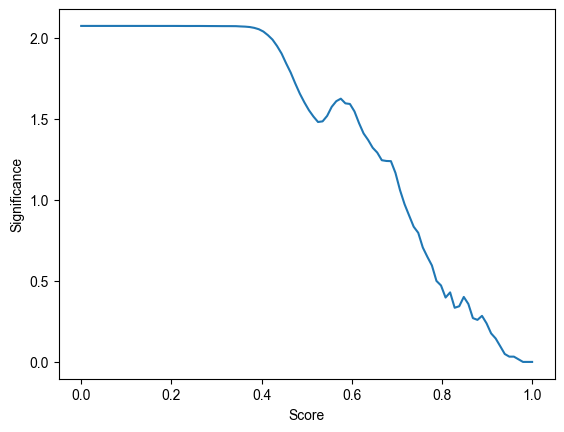

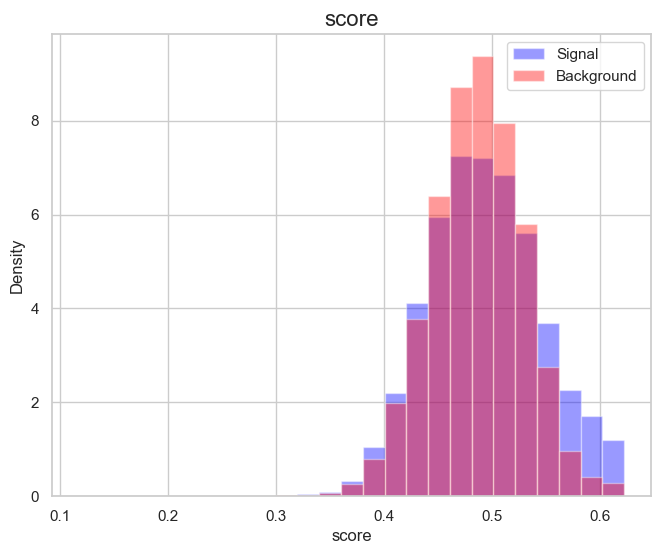

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


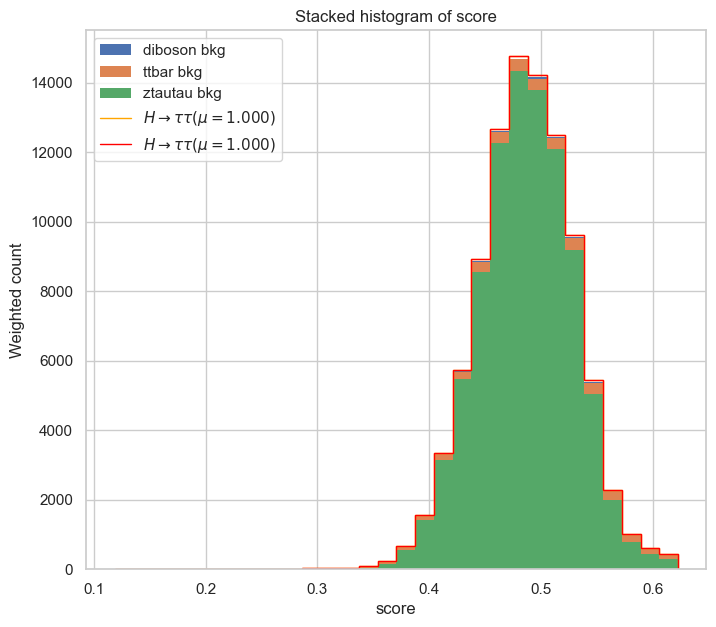

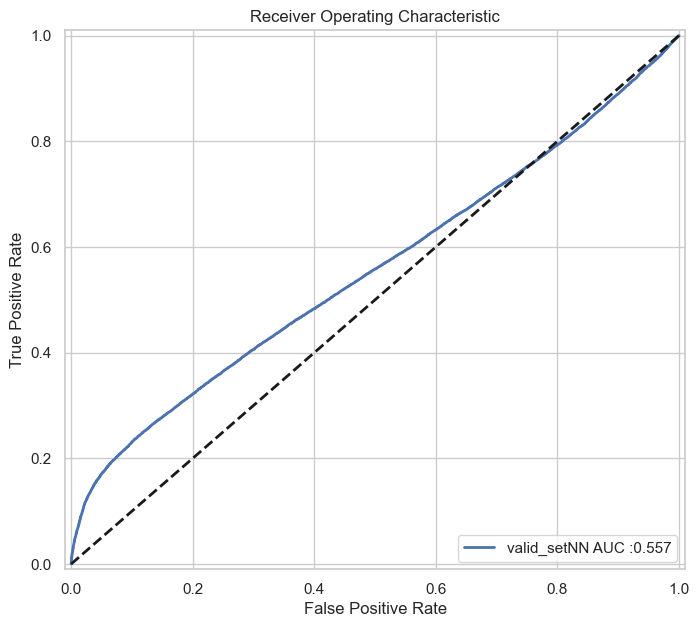

2025-06-05 19:52:52,874 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 19:52:52,890 - HiggsML.datasets     - INFO     - Selected train size: 100000


2.071465885478529


2025-06-05 19:52:53,289 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 19:52:53,330 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  669.7309172153862
sum_bkg_weights:  105049.26908278462


2025-06-05 19:52:53,814 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 19:52:53,846 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  672.0349052998582
sum_bkg_weights:  105046.9650947001


2025-06-05 19:52:54,239 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 19:52:54,311 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  674.240266361035
sum_bkg_weights:  105044.75973363896
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
12
Epoch 1/12
6250/6250 - 13s - 2ms/step - accuracy: 0.7993 - loss: 0.9838
Epoch 2/12
6250/6250 - 12s - 2ms/step - accuracy: 0.8134 - loss: 0.9420
Epoch 3/12
6250/6250 - 11s - 2ms/step - accuracy: 0.8171 - loss: 0.9316
Epoch 4/12
6250/6250 - 11s - 2ms/step - accuracy: 0.8177 - loss: 0.9248
Epoch 5/12
6250/6250 - 14s - 2ms/step - accuracy: 0.8193 - loss: 0.9207
Epoch 6/12
6250/6250 - 12s - 2ms/step - accuracy: 0.8212 - loss: 0.9149
Epoch 7/12
6250/6250 - 20s - 3ms/step - accuracy: 0.8212 - loss: 0.9126
Epoch 8/12
6250/6250 - 12s - 2ms/step - accuracy: 0.8222 - loss: 0.9094
Epoch 9/12
6250/6250 - 12s - 2ms/step - accuracy: 0.8229 - loss: 0.9063
Epoch 10/12
6250/6250 - 13s - 2ms/step - accuracy: 0.8250 - loss: 0.9029
Epoch 11/12
6250/6250 - 14s - 2ms/step - accuracy: 0.8249 - loss: 0.9003
Epoch 12/12
6250/6250 - 14s - 2ms/step - accuracy: 0.825

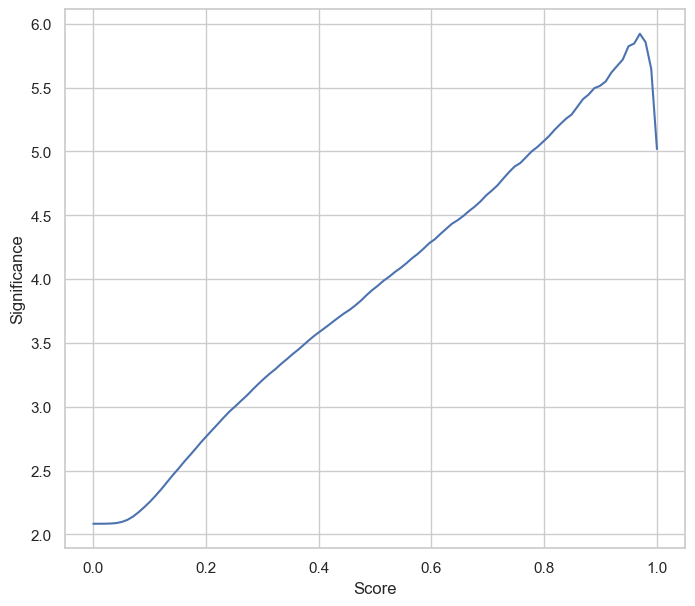

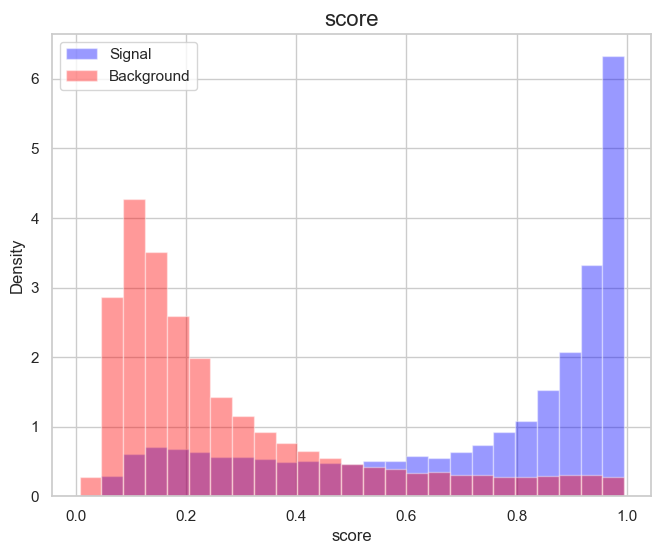

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


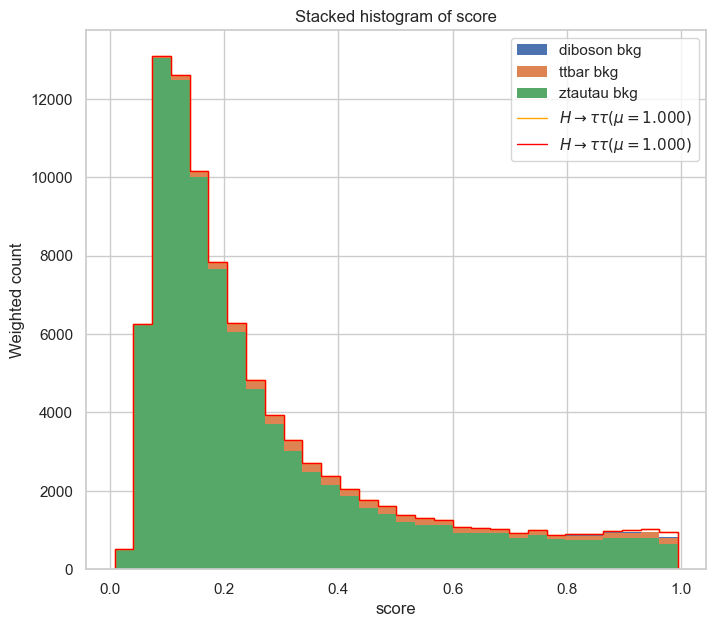

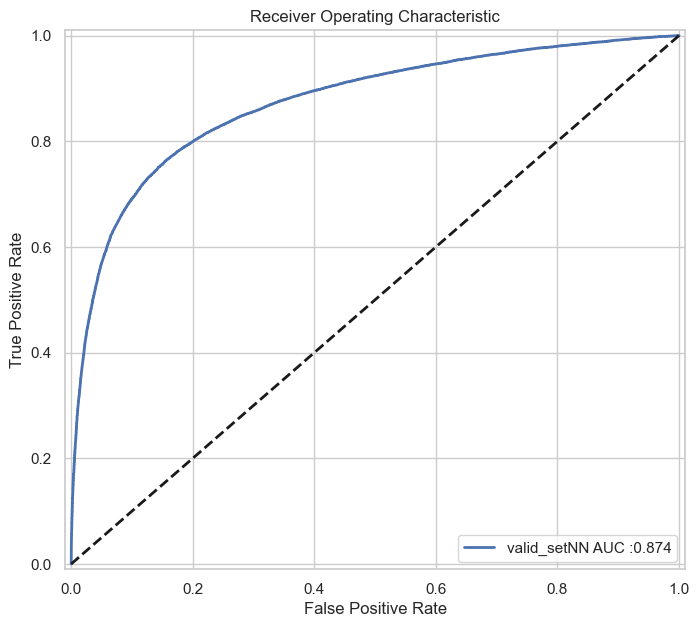

2025-06-05 19:56:07,611 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 19:56:07,627 - HiggsML.datasets     - INFO     - Selected train size: 100000


5.92199504017351


2025-06-05 19:56:08,116 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 19:56:08,170 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  670.7670057957803
sum_bkg_weights:  105048.23299420423


2025-06-05 19:56:08,607 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 19:56:08,650 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  672.4403170118319
sum_bkg_weights:  105046.55968298818


2025-06-05 19:56:09,110 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 19:56:09,198 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



sum_signal_weights:  672.7950202243243
sum_bkg_weights:  105046.2049797757
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'
 Model is NN
24
Epoch 1/24
6250/6250 - 14s - 2ms/step - accuracy: 0.7986 - loss: 0.9799
Epoch 2/24
6250/6250 - 12s - 2ms/step - accuracy: 0.8131 - loss: 0.9424
Epoch 3/24
6250/6250 - 12s - 2ms/step - accuracy: 0.8154 - loss: 0.9314
Epoch 4/24
6250/6250 - 12s - 2ms/step - accuracy: 0.8175 - loss: 0.9245
Epoch 5/24
6250/6250 - 12s - 2ms/step - accuracy: 0.8198 - loss: 0.9198
Epoch 6/24
6250/6250 - 12s - 2ms/step - accuracy: 0.8202 - loss: 0.9149
Epoch 7/24
6250/6250 - 12s - 2ms/step - accuracy: 0.8216 - loss: 0.9135
Epoch 8/24
6250/6250 - 13s - 2ms/step - accuracy: 0.8213 - loss: 0.9093
Epoch 9/24
6250/6250 - 13s - 2ms/step - accuracy: 0.8216 - loss: 0.9065
Epoch 10/24
6250/6250 - 13s - 2ms/step - accuracy: 0.8227 - loss: 0.9042
Epoch 11/24
6250/6250 - 12s - 2ms/step - accuracy: 0.8233 - loss: 0.9016
Epoch 12/24
6250/6250 - 12s - 2ms/step - accuracy: 0.823

KeyboardInterrupt: 

In [11]:
optimization(data_set)